In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("House_Rent_Dataset.csv")
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [4]:
df1 = df.drop(['Posted On', 'Area Locality', 'Area Type','Point of Contact','Floor'], axis=1)
df1

,BHK,Rent,Size,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,Kolkata,Unfurnished,Bachelors/Family,2
1,2,20000,800,Kolkata,Semi-Furnished,Bachelors/Family,1
2,2,17000,1000,Kolkata,Semi-Furnished,Bachelors/Family,1
3,2,10000,800,Kolkata,Unfurnished,Bachelors/Family,1
4,2,7500,850,Kolkata,Unfurnished,Bachelors,1
...,...,...,...,...,...,...,...
4741,2,15000,1000,Hyderabad,Semi-Furnished,Bachelors/Family,2
4742,3,29000,2000,Hyderabad,Semi-Furnished,Bachelors/Family,3
4743,3,35000,1750,Hyderabad,Semi-Furnished,Bachelors/Family,3
4744,3,45000,1500,Hyderabad,Semi-Furnished,Family,2


In [5]:
df1['City'].unique()
df1['Furnishing Status'].unique()

array(['Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object)

In [6]:
df1.isna().sum()

BHK                  0
Rent                 0
Size                 0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
dtype: int64

In [7]:
print(f"Highest Rent: {df1.Rent.max()}")
print(f"Lowest Rent: {df1.Rent.min()}")

Highest Rent: 3500000
Lowest Rent: 1200


<Axes: xlabel='Furnishing Status', ylabel='count'>

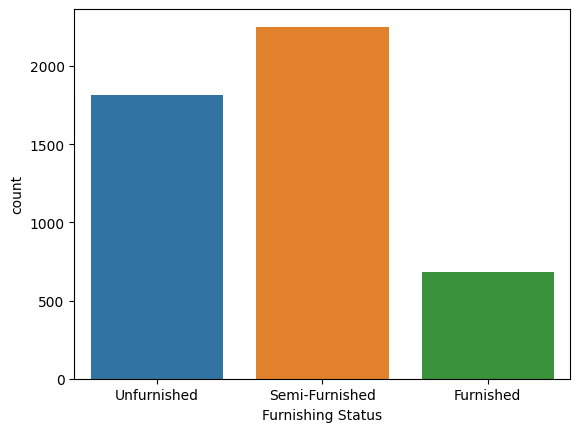

In [8]:
sb.countplot(data = df1, x='Furnishing Status')

<Axes: xlabel='Furnishing Status', ylabel='Rent'>

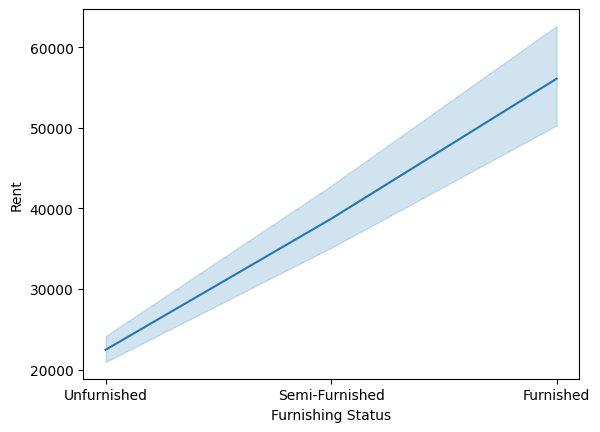

In [9]:
sb.lineplot(y ='Rent',x ='Furnishing Status',data = df1 )

<Axes: xlabel='City', ylabel='Rent'>

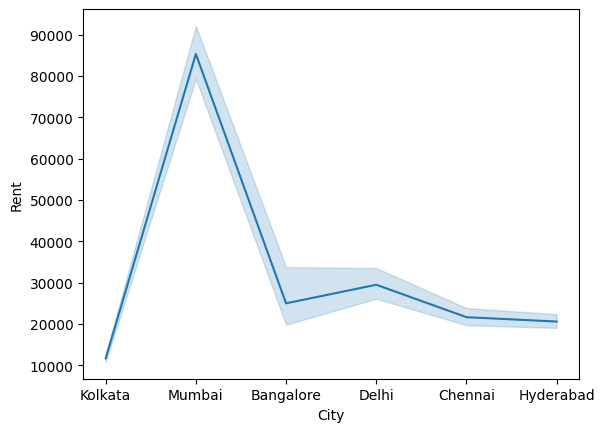

In [10]:
sb.lineplot(y='Rent',x = 'City', data = df1)

C:\Users\Home\AppData\Local\Temp\ipykernel_5520\4115631560.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df1['Rent'])


<Axes: xlabel='Rent', ylabel='Density'>

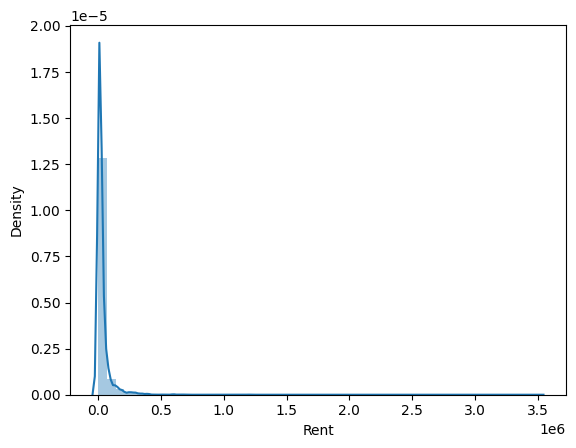

In [11]:
sb.distplot(df1['Rent'])

C:\Users\Home\AppData\Local\Temp\ipykernel_5520\1083222545.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df1.corr(), annot = True)


<Axes: >

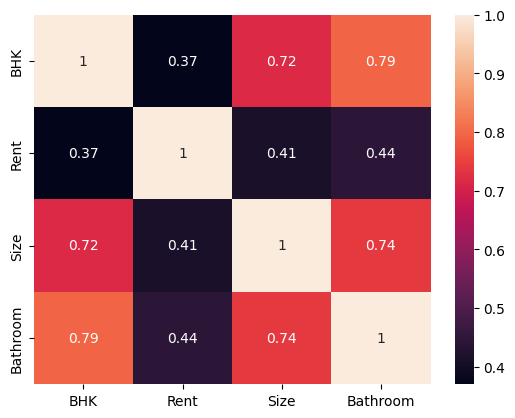

In [12]:
sb.heatmap(df1.corr(), annot = True)

<Axes: xlabel='City', ylabel='Rent'>

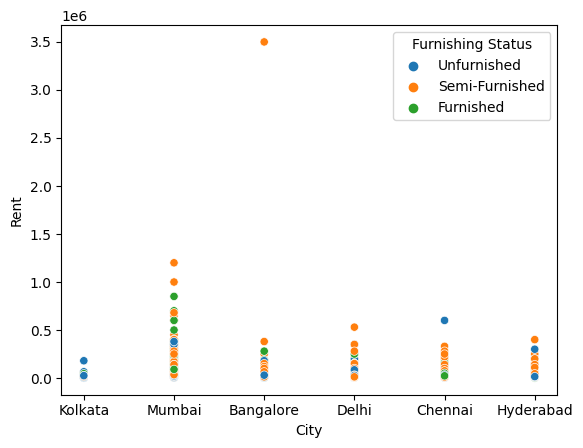

In [13]:

sb.scatterplot(x = 'City', y= 'Rent', data=df1 , hue= 'Furnishing Status' )

In [14]:
df1["City"] = df1["City"].map({"Mumbai": 4000, "Chennai": 6000, "Bangalore": 5600, "Hyderabad": 5000, "Delhi": 1100, "Kolkata": 7000})
df1["Furnishing Status"] = df1["Furnishing Status"].map({"Unfurnished": 0, "Semi-Furnished": 1,    "Furnished": 2})
df1["Tenant Preferred"] = df1["Tenant Preferred"].map({"Bachelors/Family": 2,  "Bachelors": 1,  "Family": 3})
df1.head()

,BHK,Rent,Size,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,7000,0,2,2
1,2,20000,800,7000,1,2,1
2,2,17000,1000,7000,1,2,1
3,2,10000,800,7000,0,2,1
4,2,7500,850,7000,0,1,1


In [15]:
x = np.array(df1[["BHK", "Size", "City", "Furnishing Status", "Tenant Preferred",  "Bathroom"]])
y = np.array(df1[["Rent"]])

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.40, random_state=42)

In [20]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (xtrain.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6, 128)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(xtrain, ytrain, batch_size=1, epochs=21)

Epoch 1/21
2847/2847 [==============================] - 117s 29ms/step - loss: 4903379456.0000
Epoch 2/21
2847/2847 [==============================] - 87s 31ms/step - loss: 4421253632.0000
Epoch 3/21
2847/2847 [==============================] - 84s 29ms/step - loss: 4066120960.0000
Epoch 4/21
2847/2847 [==============================] - 80s 28ms/step - loss: 3848302592.0000
Epoch 5/21
2847/2847 [==============================] - 89s 31ms/step - loss: 3661370368.0000
Epoch 6/21
2847/2847 [==============================] - 96s 34ms/step - loss: 3524273152.0000
Epoch 7/21
2847/2847 [==============================] - 84s 30ms/step - loss: 3424050688.0000
Epoch 8/21
2847/2847 [==============================] - 68s 24ms/step - loss: 3356422656.0000
Epoch 9/21
2847/2847 [==============================] - 74s 26ms/step - loss: 3346978304.0000
Epoch 10/21
2847/2847 [==============================] - 74s 26ms/step - loss: 3288126208.0000
Epoch 11/21
2847/2847 [==============================] - 9